<a href="https://colab.research.google.com/github/maticvl/dataHacker/blob/master/OPENCV_PROJECTS/Optical_Flow_Using_Horn_and_Schunck_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
h,w = 256,256
gray_1 = np.zeros((w,h),dtype = np.uint8)
gray_2 = np.zeros((w,h),dtype = np.uint8)

In [3]:
for i in range(256):
    for j in range(256):
        gray_1[i,j] = i//2+j//2
        gray_2[i,j] = i//2+j//2

In [4]:
dx = 0
dy = 2
mask = np.ones((30,30),dtype = np.uint8)*200  
gray_1[20:50,20:50] = mask
gray_2[20+dy:50+dy, 20+dx:50+dx] = mask 
diff = cv2.subtract(gray_2, gray_1)

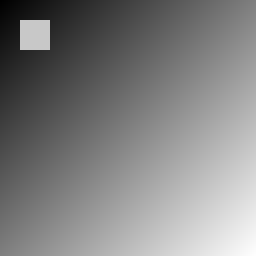

In [5]:
cv2_imshow(gray_1)

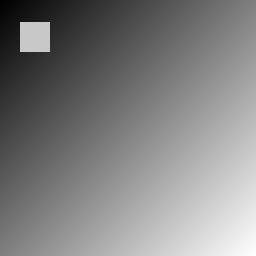

In [6]:
cv2_imshow(gray_2)

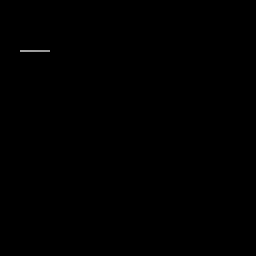

In [7]:
cv2_imshow(diff)

In [8]:
print(diff)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
flow = cv2.calcOpticalFlowFarneback(gray_1, gray_2, None, 0.5, 3, 39,  10,  11,  1.5,cv2.OPTFLOW_FARNEBACK_GAUSSIAN)  

In [10]:
index = (np.abs(flow) > 100)
flow[index] = 0
index = (np.abs(flow)) < 0.001
flow[index] = 0
index_interesting = np.abs(flow) > 0.1

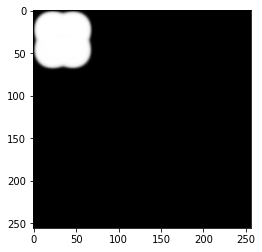

In [11]:
#flow along y axis - v
plt.imshow(flow[:,:,1], cmap = 'gray')

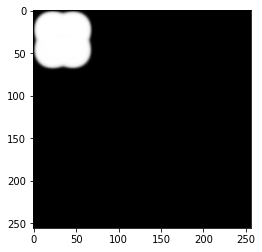

In [12]:
#flow along y axis - v
plt.imshow(flow[:,:,1], cmap = 'gray')

(array([  46.,   56.,   44.,   33.,   32.,   15.,   26.,    7.,   25.,
          15.,   14.,   21.,   20.,   22.,   14.,   14.,   31.,   12.,
           6.,   10.,   32.,    6.,    8.,    9.,   22.,    9.,   11.,
          22.,   11.,   21.,   13.,   21.,   16.,   27.,   20.,   14.,
          21.,   23.,   21.,   20.,   30.,   26.,   45.,   36.,   55.,
          42.,   74.,  102.,  201., 3073.]),
 array([0.10095458, 0.13902189, 0.17708918, 0.2151565 , 0.25322378,
        0.2912911 , 0.3293584 , 0.3674257 , 0.405493  , 0.4435603 ,
        0.4816276 , 0.5196949 , 0.5577622 , 0.5958295 , 0.6338968 ,
        0.6719641 , 0.7100314 , 0.74809873, 0.786166  , 0.8242333 ,
        0.86230063, 0.9003679 , 0.9384352 , 0.97650254, 1.0145699 ,
        1.0526371 , 1.0907044 , 1.1287718 , 1.166839  , 1.2049063 ,
        1.2429737 , 1.2810409 , 1.3191082 , 1.3571756 , 1.3952428 ,
        1.4333102 , 1.4713775 , 1.5094447 , 1.547512  , 1.5855794 ,
        1.6236466 , 1.661714  , 1.6997813 , 1.7378485 , 

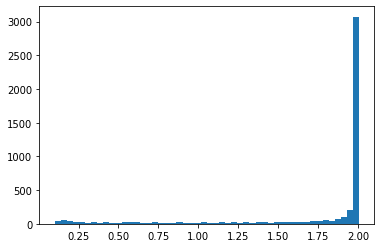

In [13]:
flow_hist = flow[index_interesting]
plt.hist(flow_hist.reshape(-1,1), bins = 50)

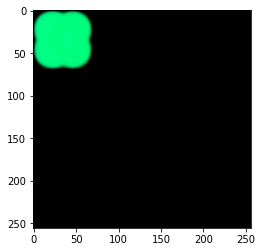

In [15]:
hsv = np.zeros( (256,256,3), dtype = np.uint8)
hsv[...,1] = 255
mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
plt.imshow(rgb)

In [16]:
!wget https://raw.githubusercontent.com/maticvl/dataHacker/master/DATA/Frame1.jpg -O "Frame1.jpg" 
!wget https://raw.githubusercontent.com/maticvl/dataHacker/master/DATA/Frame2.jpg -O "Frame2.jpg" 

--2021-01-12 08:16:11--  https://raw.githubusercontent.com/maticvl/dataHacker/master/DATA/Frame1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75216 (73K) [image/jpeg]
Saving to: ‘Frame1.jpg’

Frame1.jpg          100%[===================>]  73.45K  --.-KB/s    in 0.01s   

2021-01-12 08:16:11 (5.07 MB/s) - ‘Frame1.jpg’ saved [75216/75216]

--2021-01-12 08:16:12--  https://raw.githubusercontent.com/maticvl/dataHacker/master/DATA/Frame2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74275 (73K) [image/jpeg]
Saving to: ‘Frame2.jpg’


In [17]:
img1 = cv2.imread('Frame1.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2= cv2.imread('Frame2.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [18]:
img1.shape

(358, 761, 3)

In [19]:
img2.shape

(357, 761, 3)

In [20]:
img1 = cv2.resize(img1, (640, 320))
img2 = cv2.resize(img2, (640, 320))
M = np.zeros((2,3), dtype = np.float32)

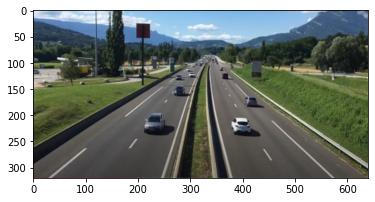

In [21]:
plt.imshow(img1)

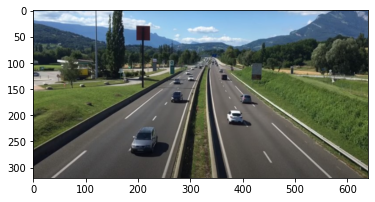

In [22]:
plt.imshow(img2)

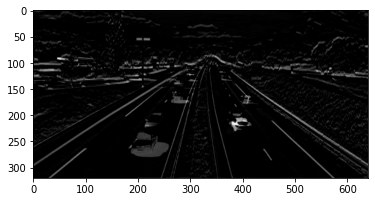

In [23]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray1, cmap = 'gray')
plt.imshow(gray2, cmap = 'gray')
gray_diff = cv2.subtract(gray1, gray2)
plt.imshow(gray_diff, cmap = 'gray')

In [24]:
flow = cv2.calcOpticalFlowFarneback(gray1, gray2, None, 0.5, 5, 15,  3,  5,  1.2, 0) 

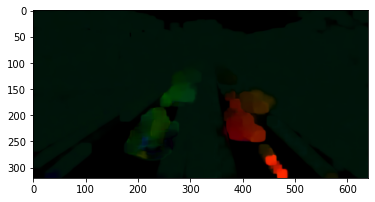

In [26]:
hsv = np.zeros( (320,640,3), dtype = np.uint8)
hsv[...,1] = 255
mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
plt.imshow(rgb)